## 第59课 使用Word Embedding+Keras建立最小语义解释器NLP

### Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

### Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. 

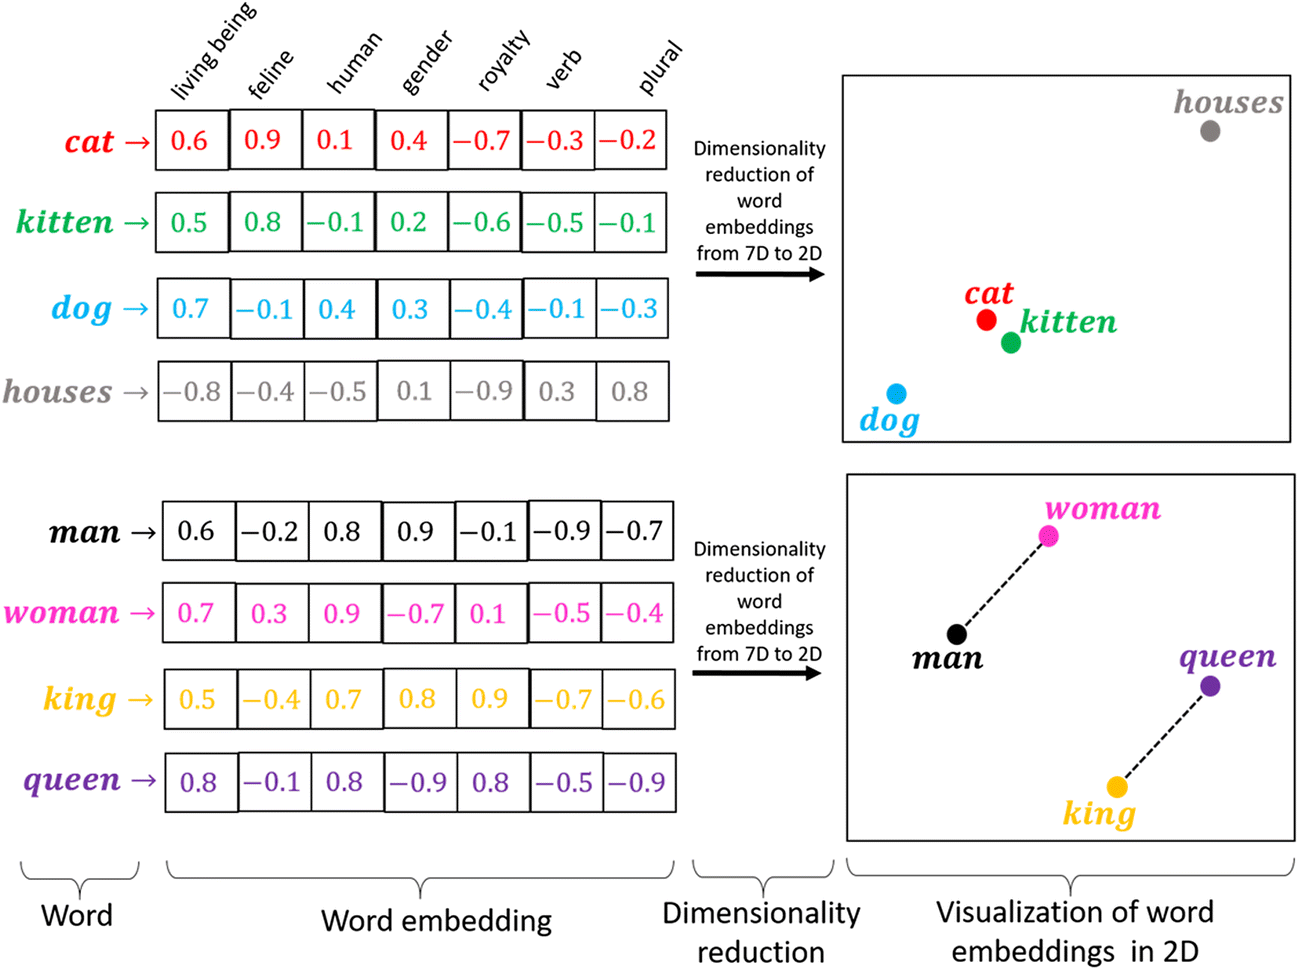

In [86]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-10.png')

#One hot encoding is a technique which converts categorical variables to numerical in an interpretable format

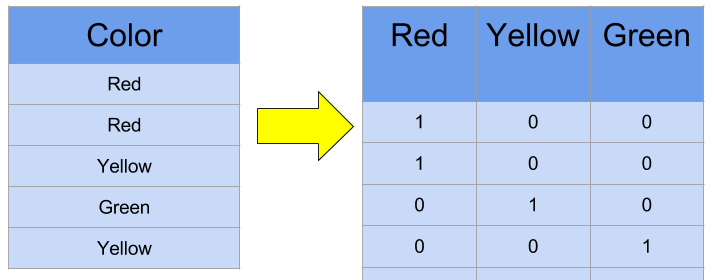

In [87]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-9.png')

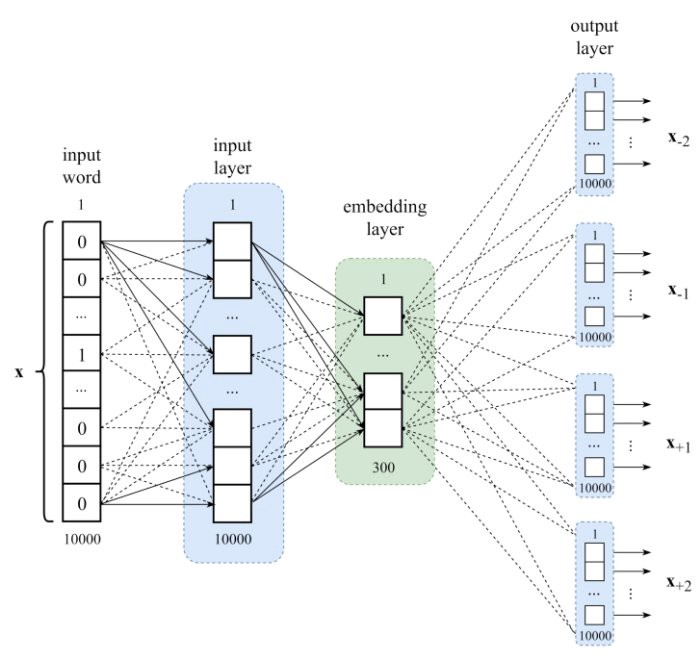

In [88]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-11.jpeg')

In [89]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [171]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [172]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

In [173]:
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

In [174]:
# integer encode the documents
vocab_size = 100
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[48, 41], [74, 4], [30, 3], [85, 4], [94], [70], [84, 3], [1, 74], [84, 4], [94, 33, 41, 42]]


In [175]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[48 41  0  0]
 [74  4  0  0]
 [30  3  0  0]
 [85  4  0  0]
 [94  0  0  0]
 [70  0  0  0]
 [84  3  0  0]
 [ 1 74  0  0]
 [84  4  0  0]
 [94 33 41 42]]


In [176]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [177]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
# summarize the model
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 4, 8)              800       
_________________________________________________________________
flatten_13 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
None


In [179]:
# fit the model
model.fit(padded_docs, labels, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.3000
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.3000
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4000
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4000
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4000
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.4000
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6000
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6000
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.6000
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.6000
Epoch 11/200
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.9000
Epoch 85/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.9000
Epoch 86/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5669 - accuracy: 0.9000
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.9000
Epoch 88/200
1/1 [==============================] - 0s 1000us/step - loss: 0.5629 - accuracy: 0.9000
Epoch 89/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.9000
Epoch 90/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.9000
Epoch 91/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.9000
Epoch 92/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.9000
Epoch 93/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.9000
Epoch 94/200
1/1 [============

1/1 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 1.0000
Epoch 168/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3885 - accuracy: 1.0000
Epoch 171/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 1.0000
Epoch 176/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 1.0000
Epoch 177/200
1/1 [=====

In [180]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=1)
print('Accuracy: %f' % (accuracy*100))

1/1 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 1.0000
Accuracy: 100.000000


In [181]:
print(model.predict(padded_docs)[9])

[0.24051642]


In [182]:
for i in range(10):
    if model.predict(padded_docs)[i] >= 0.5:
        result='good'
    else:
        result='bad'
    print(model.predict(padded_docs)[i],result)

[0.81018186] good
[0.7182754] good
[0.6993224] good
[0.79530835] good
[0.7347405] good
[0.28147745] bad
[0.30056304] bad
[0.2539276] bad
[0.4344557] bad
[0.24051642] bad


In [183]:
X1=['great work',
   'weak effort']

In [184]:
encoded_docs1 = [one_hot(d, vocab_size) for d in X1]
print(encoded_docs1)

[[30, 4], [70, 3]]


In [185]:
padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='post')
padded_docs1

array([[30,  4,  0,  0],
       [70,  3,  0,  0]])

In [186]:
print(model.predict(padded_docs1))

[[0.80612063]
 [0.30063608]]
